References:
1. Panduan Lab 2

In [343]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
import io

from skimage import color
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util

### **1. [50] Diberikan citra virus.jpg berikut ini**

a. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing
terhadap hasilnya dengan kernel 4x4

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Virus image in CMY color space with 4x4 Median Smooth Filtering')

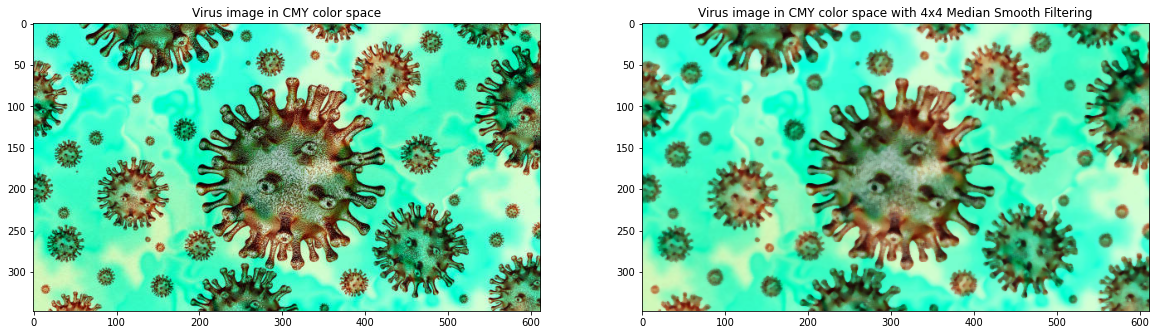

In [344]:
img_virus = io.imread("Citra Lab 2/virus.jpg")

R = img_virus[:,:,0]
G = img_virus[:,:,1]
B = img_virus[:,:,2]

C = 1 - util.img_as_float(R)
M = 1 - util.img_as_float(G)
Y = 1 - util.img_as_float(B)

CMY = np.zeros(img_virus.shape)
CMY[:,:,0] = C
CMY[:,:,1] = M
CMY[:,:,2] = Y

C_smoothened_4 = filters.rank.median(C, selem=morphology.square(4))
M_smoothened_4 = filters.rank.median(M, selem=morphology.square(4))
Y_smoothened_4 = filters.rank.median(Y, selem=morphology.square(4))

CMY_smoothened_4 = util.img_as_ubyte(np.zeros(CMY.shape))
CMY_smoothened_4[:,:,0] = C_smoothened_4
CMY_smoothened_4[:,:,1] = M_smoothened_4
CMY_smoothened_4[:,:,2] = Y_smoothened_4

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY, cmap="gray")
plt.title('Virus image in CMY color space')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_4, cmap="gray")
plt.title('Virus image in CMY color space with 4x4 Median Smooth Filtering')

b. Konversikan citra ini ke dalam color space CMY, lalu lakukan smoothing
terhadap hasilnya dengan kernel 9x9

Text(0.5, 1.0, 'Virus image in CMY color space with 9x9 Median Smooth Filtering')

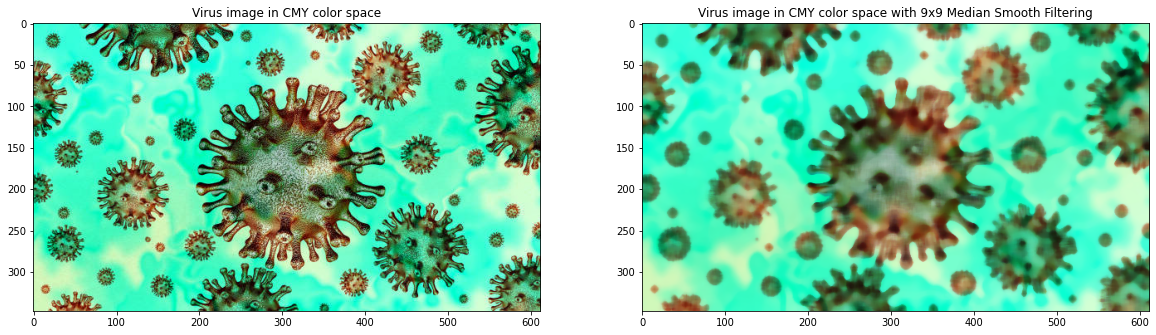

In [345]:
C_smoothened_9 = filters.rank.median(C, selem=morphology.square(9))
M_smoothened_9 = filters.rank.median(M, selem=morphology.square(9))
Y_smoothened_9 = filters.rank.median(Y, selem=morphology.square(9))

CMY_smoothened_9 = util.img_as_ubyte(np.zeros(CMY.shape))
CMY_smoothened_9[:,:,0] = C_smoothened_9
CMY_smoothened_9[:,:,1] = M_smoothened_9
CMY_smoothened_9[:,:,2] = Y_smoothened_9

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY, cmap="gray")
plt.title('Virus image in CMY color space')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_9, cmap="gray")
plt.title('Virus image in CMY color space with 9x9 Median Smooth Filtering')

c. Bandingkan hasil citra pada poin a dan b

Text(0.5, 1.0, 'Virus image in CMY color space with 9x9 Median Smooth Filtering')

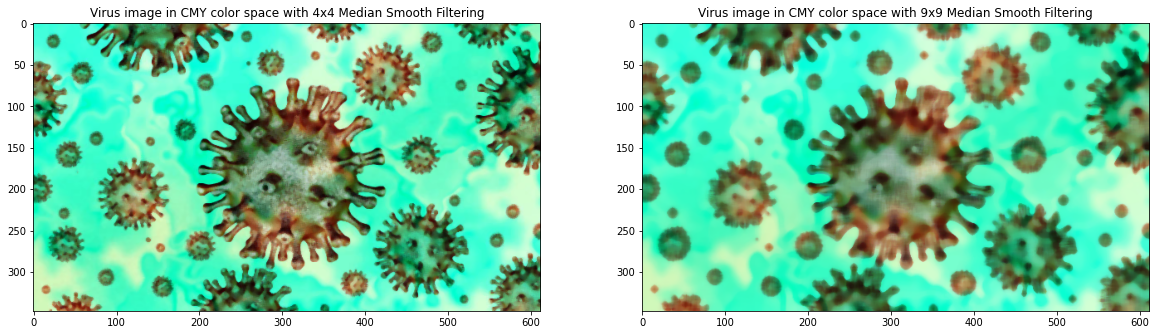

In [346]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(CMY_smoothened_4, cmap="gray")
plt.title('Virus image in CMY color space with 4x4 Median Smooth Filtering')

plt.subplot(1, 2, 2)
plt.imshow(CMY_smoothened_9, cmap="gray")
plt.title('Virus image in CMY color space with 9x9 Median Smooth Filtering')

Berdasarkan hasil pengolahan citra dengan mentransformasikan color space menjadi CMY dan melakukan smoothing pada butir a dan b, dapat diambil beberapa kesimpulan sebagai berikut:
1. Pemilihan smoothing dengan menggunakan median filtering adalah sama dengan pada lab sebelumnya, di mana banyak penelitian yang menunjukkan bahwa median filtering memberikan hasil yang lebih baik pada kebanyakan kasus
2. Terlihat bahwa smoothing dengan dimensi kernel yang lebih kecil menghasilkan hasil yang relatif masih jelas, tidak terlalu halus sehingga mendekati citra yang cenderung 'blurry'

d. Lakukan clustering menggunakan metode k-mean clustering dengan k = 4

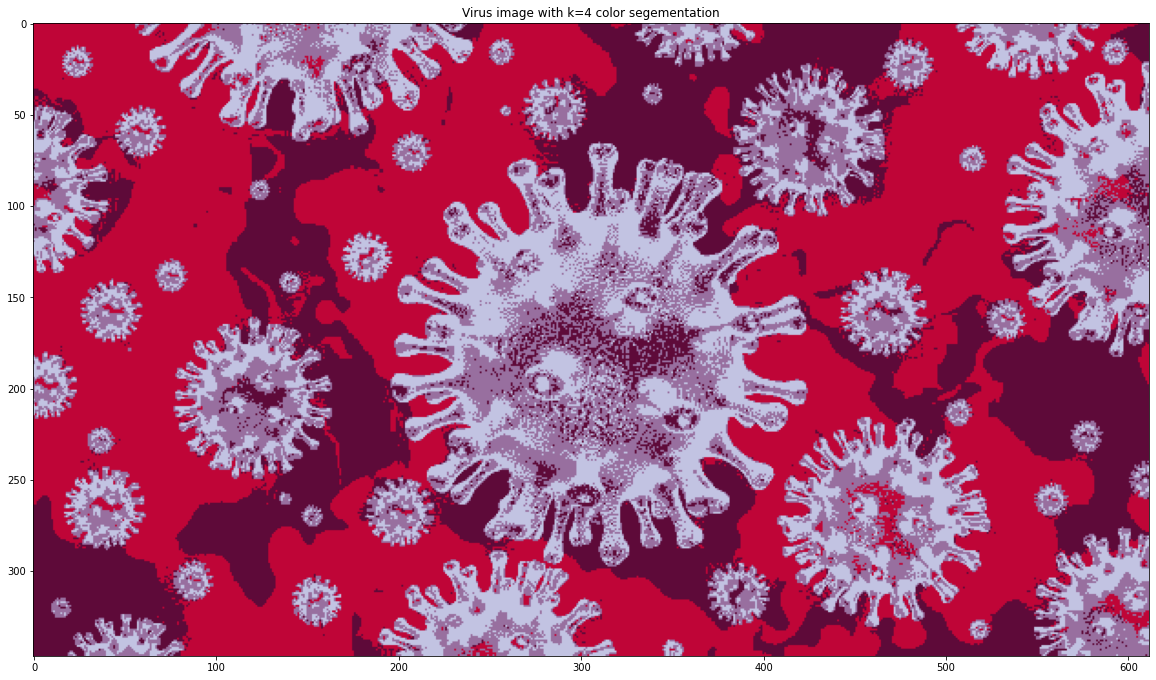

In [347]:
img_virus = cv2.imread("Citra Lab 2/virus.jpg")
img_virus = cv2.cvtColor(img_virus, cv2.COLOR_BGR2RGB)

pixel_values = img_virus.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image_4 = centers[labels.flatten()]
segmented_image_4 =segmented_image_4.reshape(img_virus.shape)

plt.figure(figsize=(20, 20))

plt.imshow(segmented_image_4)
plt.title("Virus image with k=4 color segementation")
plt.show()

e. Lakukan clustering menggunakan metode k-mean clustering dengan k = 9

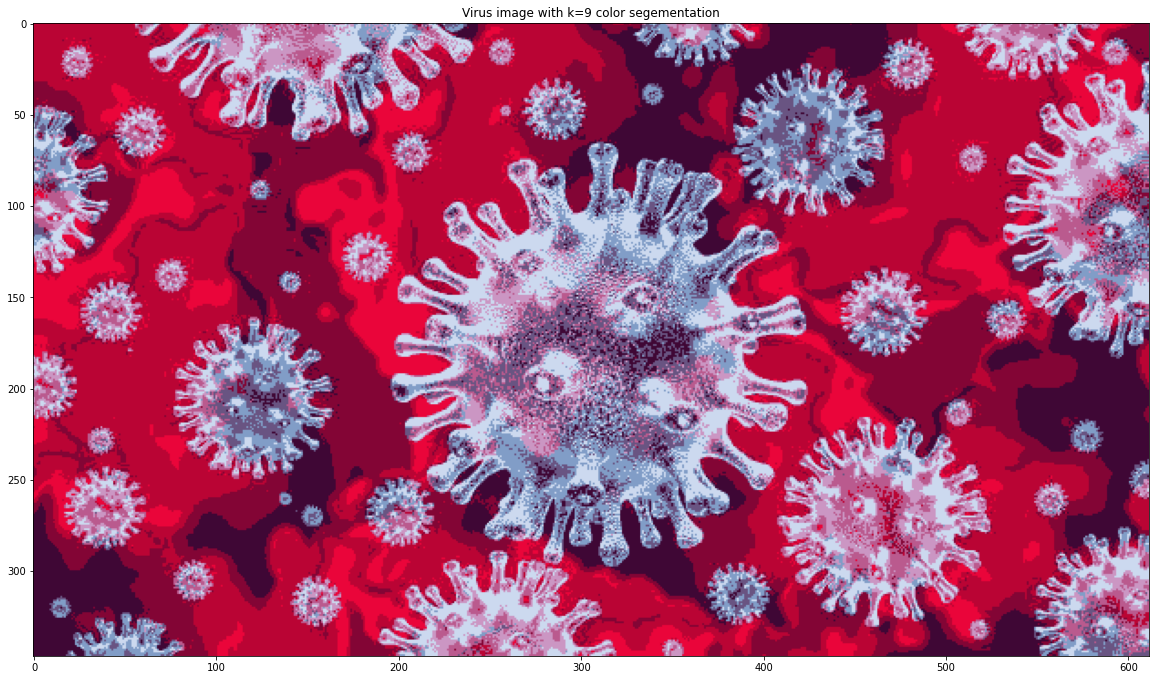

In [348]:
k = 9

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image_9 = centers[labels.flatten()]
segmented_image_9 =segmented_image_9.reshape(img_virus.shape)

plt.figure(figsize=(20, 20))

plt.imshow(segmented_image_9)
plt.title("Virus image with k=9 color segementation")
plt.show()

f. Ceritakan perbedaan yang kamu dapatkan pada poin d dan e, serta jelaskan
mengapa perbedaan tersebut bisa terjadi

Text(0.5, 1.0, 'Virus image with k=9 color segementation')

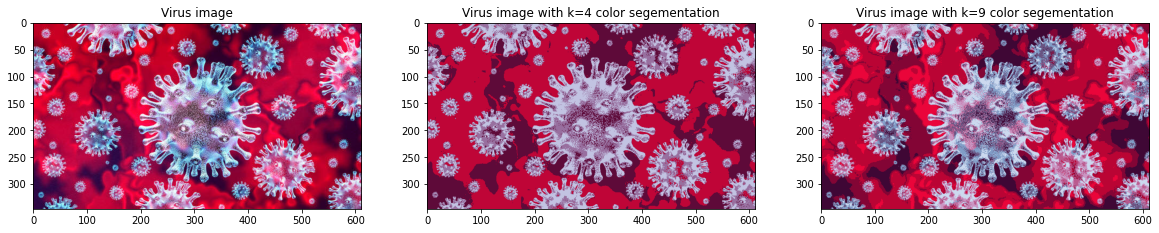

In [359]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(img_virus, cmap="gray")
plt.title('Virus image')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image_4, cmap="gray")
plt.title('Virus image with k=4 color segementation')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image_9, cmap="gray")
plt.title('Virus image with k=9 color segementation')

Berdasarkan pemrosesan dengan menggunakan color segmentation pada butir d dan e, dapat dituliskan beberapa analisis sebagai berikut:
1. Secara kasat mata, terlihat bahwa pemrosesan color segmentation dengan nilai k-means lebih kecil berdampak pada warna yang ditampilkan lebih sedikit daripada citra aslinya
2. Hal ini sejalan dengan tujuan color segmentation dengan k-means clustering, yaitu untuk melakukan simplifikasi pada warna, sehingga dihasilkan citra yang lebih bermakna

### **2. [50] Diberikan citra bird.jpg berikut ini**

a. Terapkan sharpening pada gambar tersebut untuk ketiga channel R, G, dan B

Text(0.5, 1.0, 'Bird image with sharpening')

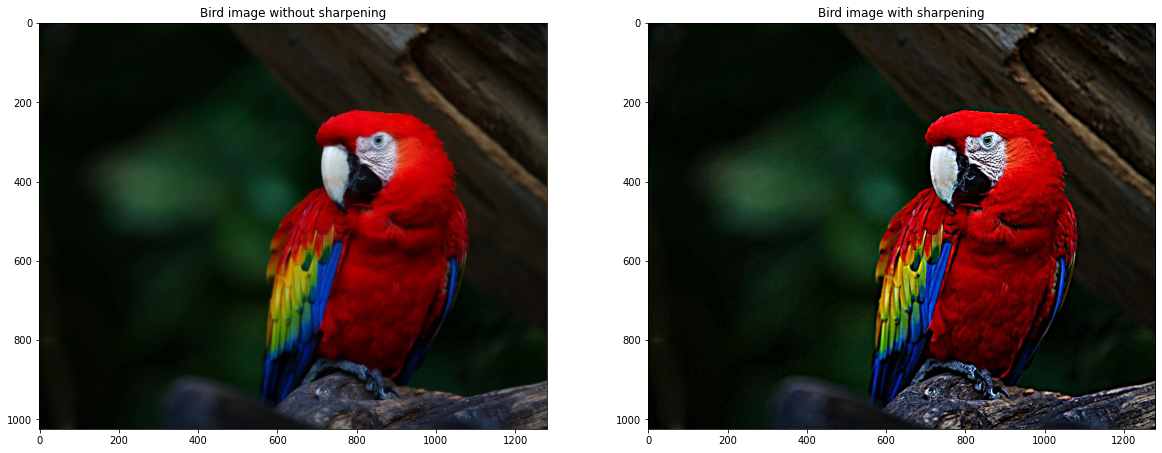

In [350]:
img_bird = io.imread("Citra Lab 2/bird.jpg")

R = img_bird[:,:,0]
G = img_bird[:,:,1]
B = img_bird[:,:,2]

R_sharpened = util.img_as_ubyte(filters.unsharp_mask(R, radius=5, amount=2))
G_sharpened = util.img_as_ubyte(filters.unsharp_mask(G, radius=5, amount=2))
B_sharpened = util.img_as_ubyte(filters.unsharp_mask(B, radius=5, amount=2))

img_bird_sharpened = util.img_as_ubyte(np.zeros(img_bird.shape))
img_bird_sharpened[:,:,0] = R_sharpened
img_bird_sharpened[:,:,1] = G_sharpened
img_bird_sharpened[:,:,2] = B_sharpened

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_bird, cmap="gray")
plt.title('Bird image without sharpening')

plt.subplot(1, 2, 2)
plt.imshow(img_bird_sharpened, cmap="gray")
plt.title('Bird image with sharpening')

b. Terapkan contrast stretching terhadap ketiga channel R, G dan B lalu tampilkan
hasilnya sebagai satu citra!

Text(0.5, 1.0, 'Bird image with contrast stretching')

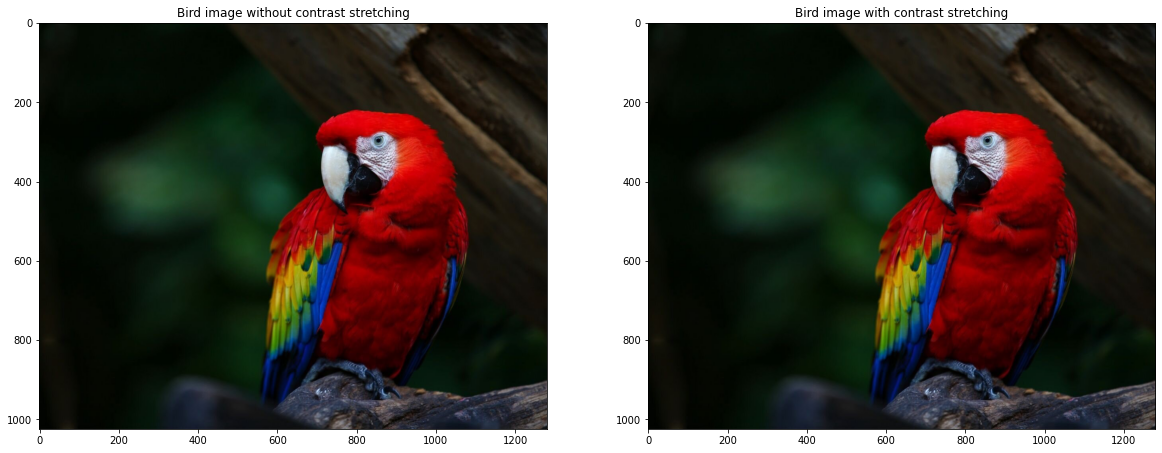

In [351]:
def do_contrast_stretching(channel):
    mn = min(channel.flatten())
    mx = max(channel.flatten())
    b = int(np.floor(255 / (mx - mn)))

    return (channel - mn) * b

R_cs = do_contrast_stretching(R)
G_cs = do_contrast_stretching(G)
B_cs = do_contrast_stretching(B)

img_bird_cs = util.img_as_ubyte(np.zeros(img_bird.shape))
img_bird_cs[:,:,0] = R_cs
img_bird_cs[:,:,1] = G_cs
img_bird_cs[:,:,2] = B_cs

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_bird, cmap="gray")
plt.title('Bird image without contrast stretching')

plt.subplot(1, 2, 2)
plt.imshow(img_bird_cs, cmap="gray")
plt.title('Bird image with contrast stretching')

c. Lakukan konversi gambar bird.jpg tersebut menjadi bentuk citra HSV! Terapkan
sharpening pada gambar tersebut pada channel V. Jangan lupa untuk mengubah
citra HSV menjadi RGB terlebih dahulu sebelum ditampilkan.

Text(0.5, 1.0, 'Bird image with sharpening in channel V')

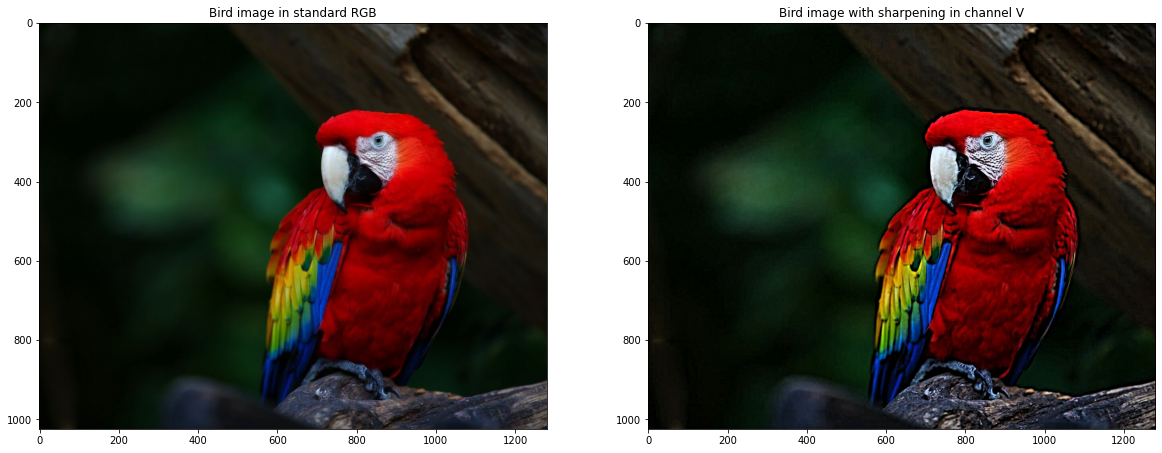

In [352]:
img_bird_HSV = util.img_as_ubyte(color.rgb2hsv(img_bird))

V = img_bird_HSV[:,:,2]

V_sharpened = util.img_as_ubyte(filters.unsharp_mask(V, radius=5, amount=2))

img_bird_HSV_sharpened = copy.deepcopy(img_bird_HSV)
img_bird_HSV_sharpened[:,:,2] = V_sharpened

img_bird_v_sharpened = util.img_as_ubyte(color.hsv2rgb(img_bird_HSV_sharpened))

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_bird, cmap="gray")
plt.title('Bird image in standard RGB')

plt.subplot(1, 2, 2)
plt.imshow(img_bird_v_sharpened, cmap="gray")
plt.title('Bird image with sharpening in channel V')

d. Terapkan contrast stretching terhadap channel V lalu tampilkan hasilnya sebagai
satu citra! Jangan lupa untuk mengubah citra HSV menjadi RGB terlebih dahulu
sebelum ditampilkan.

Text(0.5, 1.0, 'Bird image with contrast stretching in channel V')

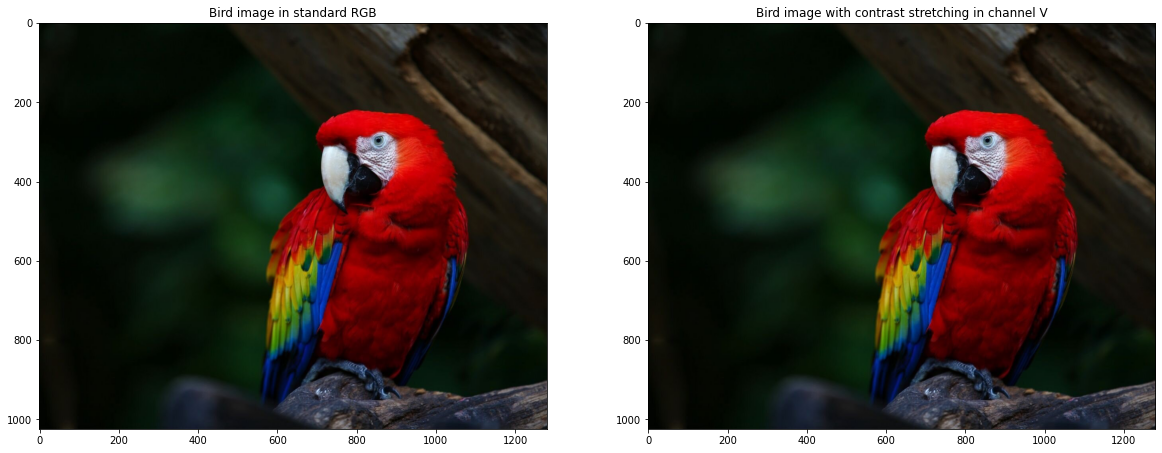

In [353]:
V_cs = do_contrast_stretching(V)

img_bird_HSV_cs = copy.deepcopy(img_bird_HSV)
img_bird_HSV_cs[:,:,2] = V_cs

img_bird_v_cs = util.img_as_ubyte(color.hsv2rgb(img_bird_HSV_cs))

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_bird, cmap="gray")
plt.title('Bird image in standard RGB')

plt.subplot(1, 2, 2)
plt.imshow(img_bird_v_cs, cmap="gray")
plt.title('Bird image with contrast stretching in channel V')

e. Ceritakan perbedaan dari citra awal, citra hasil sharpening, dan hasil contrast
stretching pada channel RGB dan channel V (hint: gunakan histogram untuk
menunjukkan perbedaan)

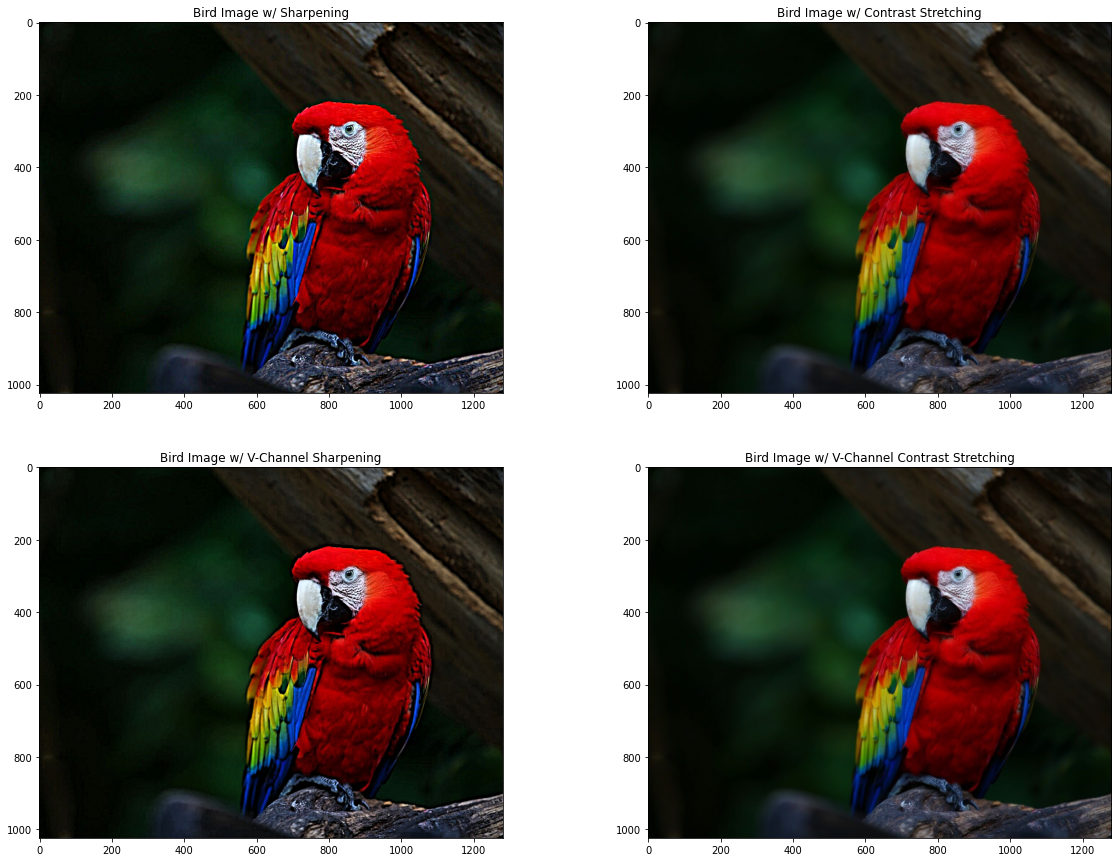

In [358]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.imshow(img_bird_sharpened, cmap="gray")
plt.title('Bird Image w/ Sharpening')

plt.subplot(2, 2, 2)
plt.imshow(img_bird_cs, cmap="gray")
plt.title('Bird Image w/ Contrast Stretching')

plt.subplot(2, 2, 3)
plt.imshow(img_bird_v_sharpened, cmap="gray")
plt.title('Bird Image w/ V-Channel Sharpening')

plt.subplot(2, 2, 4)
plt.imshow(img_bird_v_cs, cmap="gray")
plt.title('Bird Image w/ V-Channel Contrast Stretching')

plt.show()

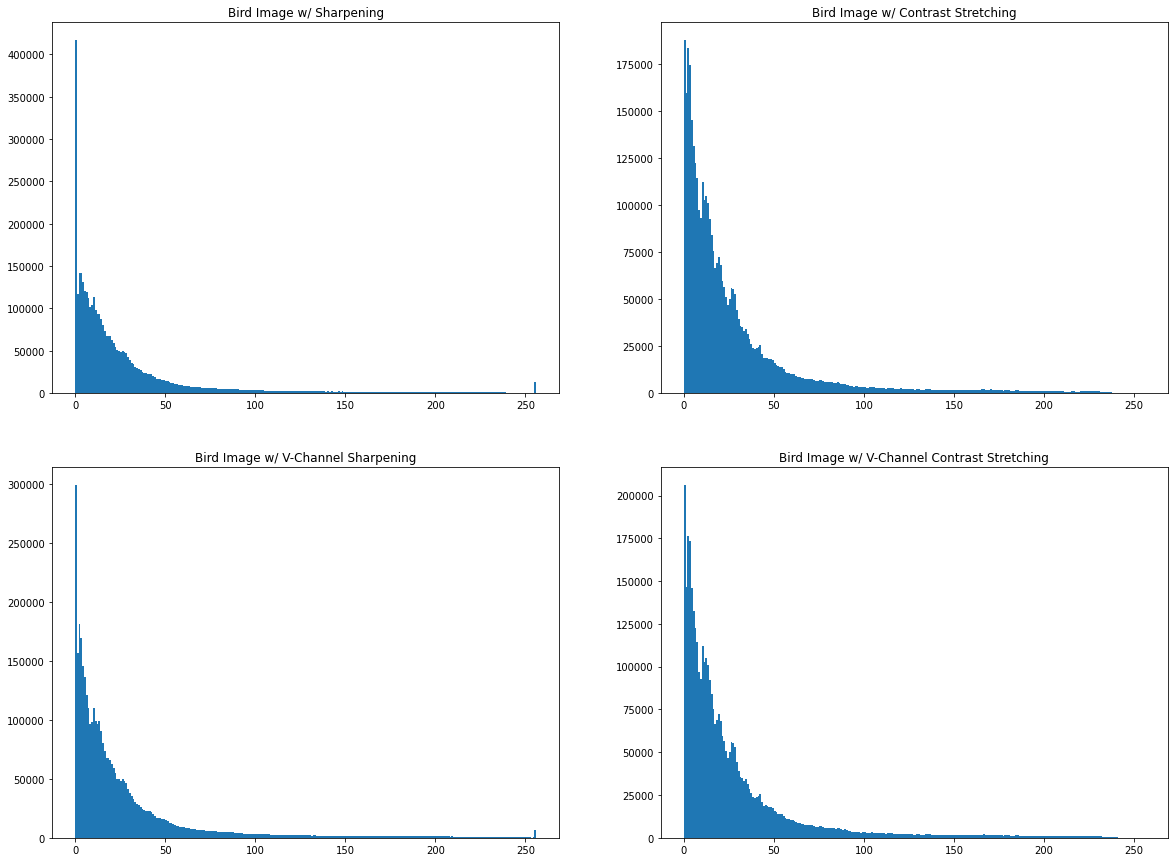

In [357]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.hist(img_bird_sharpened.flatten(), 256, range=(0,256))
plt.title('Bird Image w/ Sharpening')

plt.subplot(2, 2, 2)
plt.hist(img_bird_cs.flatten(), 256, range=(0,256))
plt.title('Bird Image w/ Contrast Stretching')

plt.subplot(2, 2, 3)
plt.hist(img_bird_v_sharpened.flatten(), 256, range=(0,256))
plt.title('Bird Image w/ V-Channel Sharpening')

plt.subplot(2, 2, 4)
plt.hist(img_bird_v_cs.flatten(), 256, range=(0,256))
plt.title('Bird Image w/ V-Channel Contrast Stretching')

plt.show()

Terlihat bahwa hasil sharpening dan contrast stretching pada RGB dan HSV (Channel V saja) mirip